# Sprint 3 coding Part

In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
import plotly.express as px
import numpy as np
import plotly.graph_objects as go
from scipy import stats
from scipy.stats import shapiro
import matplotlib.pyplot as plt


# Coding Part for Question 2: A and B 
    A.	Use first year data of Household category to create ABC Analysis and interpret the graph. [4 points]
    B.	How stable is the customers’ demand? (Coefficient of Variation) 
    To understand which products will bring planning and distribution challenges, compute the coefficient of variation of the yearly distribution of sales of each reference. [4 points]


In [ ]:
Items_column = ['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id']
Date_column = ['d_' + str(i) for i in range(1, 366)]
df = pd.read_csv("sales_train_evaluation.csv")

CALENDAR_DF = pd.read_csv('calendar.csv')
dict_week = dict(zip(CALENDAR_DF.d.values, CALENDAR_DF.wm_yr_wk.values))

df = pd.read_csv('sales_train_evaluation.csv')
print("{:,} records for train data set".format(len(df)))

df['id'] = df['store_id'] + '-' + df['item_id']

df.set_index(Items_column, inplace = True)

df = df[Date_column]

df.head()


30,490 records for train data set


,,,,,,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,...,d_356,d_357,d_358,d_359,d_360,d_361,d_362,d_363,d_364,d_365
id,item_id,dept_id,cat_id,store_id,state_id,,,,,,,,,,,,,,,,,,,,,
CA_1-HOBBIES_1_001,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CA_1-HOBBIES_1_002,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0
CA_1-HOBBIES_1_003,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CA_1-HOBBIES_1_004,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,...,0,1,1,8,1,3,0,1,2,3
CA_1-HOBBIES_1_005,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


Creation of Pricing matrix

In [ ]:
PRICES = pd.read_csv('sell_prices.csv')
print("{:,} records for sales price".format(len(PRICES)))

PRICES['item_store_id'] = PRICES['store_id'] + '-' + PRICES['item_id']

PRICES = PRICES.pivot(index='item_store_id', columns='wm_yr_wk', values='sell_price').fillna(0)

M = PRICES.to_numpy()

pr_n = dict(zip(PRICES.index, range(len(PRICES.index))))
pr_p = dict(zip(PRICES.columns, range(len(PRICES.columns))))
print("{:,} records for sales price pivot".format(len(PRICES)))
PRICES.head()

6,841,121 records for sales price
30,490 records for sales price pivot


wm_yr_wk,11101,11102,11103,11104,11105,11106,11107,11108,11109,11110,...,11612,11613,11614,11615,11616,11617,11618,11619,11620,11621
item_store_id,,,,,,,,,,,,,,,,,,,,,
CA_1-FOODS_1_001,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,...,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24
CA_1-FOODS_1_002,7.88,7.88,7.88,7.88,7.88,7.88,7.88,7.88,7.88,7.88,...,9.48,9.48,9.48,9.48,9.48,9.48,9.48,9.48,9.48,9.48
CA_1-FOODS_1_003,2.88,2.88,2.88,2.88,2.88,2.88,2.88,2.88,2.88,2.88,...,3.23,3.23,3.23,3.23,3.23,3.23,3.23,3.23,3.23,3.23
CA_1-FOODS_1_004,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1.96,1.96,1.96,1.96,1.96,1.96,1.96,1.96,1.96,1.96
CA_1-FOODS_1_005,2.94,2.94,2.94,2.94,2.94,2.94,2.94,2.94,2.94,2.94,...,3.54,3.54,3.54,3.54,3.54,3.54,3.54,3.54,3.54,3.54


Calculation of Standard deviation and mean

In [ ]:

df['mean'] = df[Date_column].mean(axis = 1)

df['std'] = df[Date_column].std(axis = 1)


print("{:,} records for the full scope".format(len(df)))
df = df[df['mean']>0]
print("{:,} records for after filter".format(len(df)))
df.reset_index(inplace = True)

df.head()


30,490 records for the full scope
17,055 records for after filter


,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_358,d_359,d_360,d_361,d_362,d_363,d_364,d_365,mean,std
0,CA_1-HOBBIES_1_002,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,0,0,1,1,0,0,0.175342,0.459270
1,CA_1-HOBBIES_1_004,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,8,1,3,0,1,2,3,1.282192,1.504512
2,CA_1-HOBBIES_1_005,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,0,0,0,0.794521,1.543854
3,CA_1-HOBBIES_1_008,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,12,15,0,0,...,20,26,0,9,14,0,8,18,6.854795,8.556423
4,CA_1-HOBBIES_1_009,HOBBIES_1_009,HOBBIES_1,HOBBIES,CA_1,CA,2,0,7,3,...,1,0,0,1,0,0,3,0,1.816438,2.486613


Calculation of Turnover

In [ ]:

df['units'] = df[Date_column].sum(axis = 1)

df['TO'] = 0 
for col in Date_column:
    df['TO'] = df['TO'] + df[col] * df[['id', col]].apply(
        lambda t: M[pr_n[t['id']], pr_p[dict_week[col]]], axis = 1)
# Sigma
df.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_360,d_361,d_362,d_363,d_364,d_365,mean,std,units,TO
0,CA_1-HOBBIES_1_002,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,1,1,0,0,0.175342,0.459270,64,254.08
1,CA_1-HOBBIES_1_004,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,2,3,1.282192,1.504512,468,2031.12
2,CA_1-HOBBIES_1_005,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,0,0.794521,1.543854,290,800.70
3,CA_1-HOBBIES_1_008,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,12,15,0,0,...,0,9,14,0,8,18,6.854795,8.556423,2502,1237.92
4,CA_1-HOBBIES_1_009,HOBBIES_1_009,HOBBIES_1,HOBBIES,CA_1,CA,2,0,7,3,...,0,1,0,0,3,0,1.816438,2.486613,663,1151.04


Calculation of Co-efficient of variance

In [ ]:

df['CV'] = df['std']/df['mean']
df.head()


,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_361,d_362,d_363,d_364,d_365,mean,std,units,TO,CV
0,CA_1-HOBBIES_1_002,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,1,0,0,0.175342,0.459270,64,254.08,2.619273
1,CA_1-HOBBIES_1_004,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,3,0,1,2,3,1.282192,1.504512,468,2031.12,1.173391
2,CA_1-HOBBIES_1_005,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,0.794521,1.543854,290,800.70,1.943127
3,CA_1-HOBBIES_1_008,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,12,15,0,0,...,9,14,0,8,18,6.854795,8.556423,2502,1237.92,1.248239
4,CA_1-HOBBIES_1_009,HOBBIES_1_009,HOBBIES_1,HOBBIES,CA_1,CA,2,0,7,3,...,1,0,0,3,0,1.816438,2.486613,663,1151.04,1.368950


SKU Calculation

In [ ]:

DF_FINAL = df[df['cat_id']=='HOUSEHOLD'].drop(['mean', 'std', 'CV'], axis = 1).copy()
DF_FINAL = DF_FINAL.groupby(['item_id', 'dept_id', 'cat_id']).sum()


DF_FINAL['mean'] = DF_FINAL[Date_column].mean(axis = 1)

DF_FINAL = DF_FINAL[DF_FINAL['mean']>0]

DF_FINAL['std'] = DF_FINAL[Date_column].std(axis = 1)

DF_FINAL['CV'] = DF_FINAL['std']/DF_FINAL['mean']
DF_FINAL.reset_index(inplace = True)

DF_FINAL['Normality_p'] = DF_FINAL[Date_column].apply(lambda row : stats.shapiro(row)[1], axis = 1)
alpha = 0.001
DF_FINAL['Not_Normal'] = DF_FINAL['Normality_p'] < alpha


DF_FINAL = DF_FINAL.drop(Date_column, axis =1).copy()
DF_FINAL['TO%'] = (100*DF_FINAL['TO']/DF_FINAL['TO'].sum())

DF_FINAL.sort_values(['TO%'], ascending = False, inplace = True, ignore_index=True)
DF_FINAL['TO%_CS'] = DF_FINAL['TO%'].cumsum()


n_sku = len(DF_FINAL)
n_a, n_b = int(0.05*n_sku), int(0.5*n_sku)
DF_FINAL['SKU_ID'] = pd.Series(range(1, len(DF_FINAL))).astype(int)
DF_FINAL['SKU_%'] = (100 * pd.Series(range(1, len(DF_FINAL))) / len(DF_FINAL))
DF_FINAL['ABC'] = pd.Series(range(len(DF_FINAL))).apply(lambda t: 'A' if t <= n_a-1 else 'B' if t <= n_b-1 else 'C')

to_a, to_b = DF_FINAL[DF_FINAL['SKU_ID']==n_a]['TO%'].max(), DF_FINAL[DF_FINAL['SKU_ID']==n_b]['TO%'].max()

print("{:,} unique SKU".format(len(DF_FINAL)))
DF_FINAL.head()



649 unique SKU


,item_id,dept_id,cat_id,units,TO,mean,std,CV,Normality_p,Not_Normal,TO%,TO%_CS,SKU_ID,SKU_%,ABC
0,HOUSEHOLD_1_272,HOUSEHOLD_1,HOUSEHOLD,13140,131153.24,36.000000,12.032694,0.334241,1.809867e-06,True,1.755437,1.755437,1.0,0.154083,A
1,HOUSEHOLD_1_535,HOUSEHOLD_1,HOUSEHOLD,16363,114050.11,44.830137,32.722420,0.729920,2.122375e-12,True,1.526518,3.281956,2.0,0.308166,A
2,HOUSEHOLD_1_072,HOUSEHOLD_1,HOUSEHOLD,11944,96733.54,32.723288,11.058915,0.337952,4.101105e-01,False,1.294742,4.576698,3.0,0.462250,A
3,HOUSEHOLD_1_053,HOUSEHOLD_1,HOUSEHOLD,5936,89924.92,16.263014,8.938242,0.549606,2.806093e-07,True,1.203612,5.780310,4.0,0.616333,A
4,HOUSEHOLD_1_440,HOUSEHOLD_1,HOUSEHOLD,5865,89088.55,16.068493,8.353996,0.519899,5.088554e-06,True,1.192417,6.972727,5.0,0.770416,A


Coefficient of Variation distribution

c:\Users\sarth\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


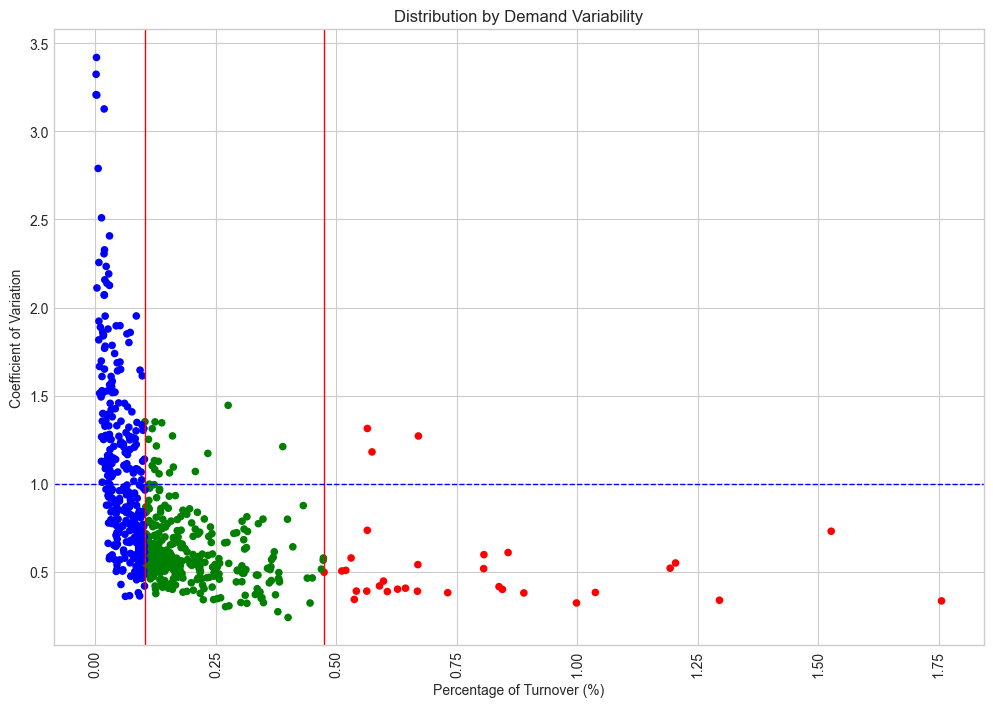

In [ ]:
ax = plt.gca()
colors = {'A':'red', 'B':'green', 'C':'blue'}

df_plot = DF_FINAL[DF_FINAL['CV']<4].copy()
df_plot.plot.scatter(figsize=(12, 8), x='TO%', y='CV', color=df_plot['ABC'].map(colors), ax =ax, grid = True)

ax.axvline(to_a , color="red", linestyle="-", linewidth = 1.0)
ax.axvline(to_b , color="red", linestyle="-", linewidth = 1.0)

ax.axhline(1 , color="blue", linestyle="--", linewidth = 1.0)
plt.xlabel('Percentage of Turnover (%)')
plt.xticks(rotation=90)
plt.ylabel('Coefficient of Variation')
plt.title('Distribution by Demand Variability')
plt.show()


# ABC analysis plotting (Answer for product segmentation)

I have used abc_analysis to simplify the plotting of the graphs of ABC and then I tabulated the SKU's A,B,C.

c:\Users\sarth\AppData\Local\Programs\Python\Python310\lib\site-packages\abc_analysis\abc_analysis.py:163: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y = pd.Series([0]).append(y)
c:\Users\sarth\AppData\Local\Programs\Python\Python310\lib\site-packages\abc_analysis\abc_analysis.py:164: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x = pd.Series([0]).append(x)


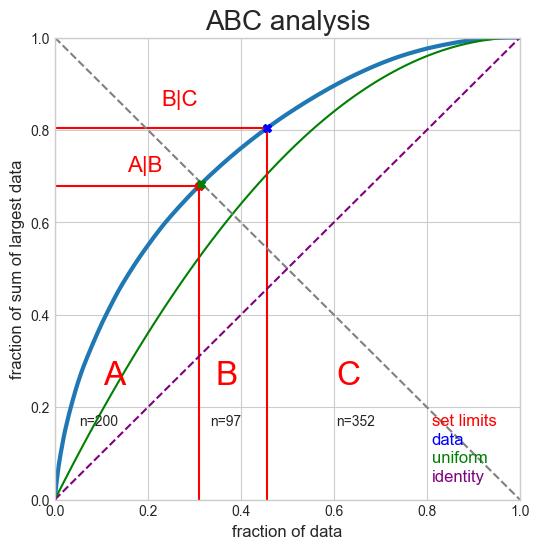

In [ ]:
from abc_analysis import abc_analysis, abc_plot

abc = abc_analysis(DF_FINAL['TO'], True)

In [ ]:

a_index = abc['Aind']
b_index = abc['Bind']
c_index = abc['Cind']

cond_list = [DF_FINAL.index.isin(a_index),
             DF_FINAL.index.isin(b_index),
             DF_FINAL.index.isin(c_index)]

choice_list = ['A','B','C']

DF_FINAL['abc'] = np.select(cond_list, choice_list)
DF_FINAL.sort_values(by=['TO'], ascending=False)

,item_id,dept_id,cat_id,units,TO,mean,std,CV,Normality_p,Not_Normal,TO%,TO%_CS,SKU_ID,SKU_%,ABC,abc
0,HOUSEHOLD_1_272,HOUSEHOLD_1,HOUSEHOLD,13140,131153.24,36.000000,12.032694,0.334241,1.809867e-06,True,1.755437,1.755437,1.0,0.154083,A,A
1,HOUSEHOLD_1_535,HOUSEHOLD_1,HOUSEHOLD,16363,114050.11,44.830137,32.722420,0.729920,2.122375e-12,True,1.526518,3.281956,2.0,0.308166,A,A
2,HOUSEHOLD_1_072,HOUSEHOLD_1,HOUSEHOLD,11944,96733.54,32.723288,11.058915,0.337952,4.101105e-01,False,1.294742,4.576698,3.0,0.462250,A,A
3,HOUSEHOLD_1_053,HOUSEHOLD_1,HOUSEHOLD,5936,89924.92,16.263014,8.938242,0.549606,2.806093e-07,True,1.203612,5.780310,4.0,0.616333,A,A
4,HOUSEHOLD_1_440,HOUSEHOLD_1,HOUSEHOLD,5865,89088.55,16.068493,8.353996,0.519899,5.088554e-06,True,1.192417,6.972727,5.0,0.770416,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,HOUSEHOLD_1_394,HOUSEHOLD_1,HOUSEHOLD,2,9.76,0.005479,0.073922,13.490687,5.808091e-39,True,0.000131,99.999848,645.0,99.383667,C,C
645,HOUSEHOLD_2_346,HOUSEHOLD_2,HOUSEHOLD,1,3.00,0.002740,0.052342,19.104973,3.135480e-39,True,0.000040,99.999888,646.0,99.537750,C,C
646,HOUSEHOLD_2_401,HOUSEHOLD_2,HOUSEHOLD,1,3.00,0.002740,0.052342,19.104973,3.135480e-39,True,0.000040,99.999928,647.0,99.691834,C,C
647,HOUSEHOLD_1_529,HOUSEHOLD_1,HOUSEHOLD,1,2.87,0.002740,0.052342,19.104973,3.135480e-39,True,0.000038,99.999967,648.0,99.845917,C,C


Final Answer

In [ ]:
DF_FINAL['abc'].value_counts()

C    352
A    200
B     97
Name: abc, dtype: int64

# Coding part : C.	Discuss a few initiatives and recommendation for improving the retail business for temp_dataframeset_02 (as per the question paper)

temp_dataframe loading of this section

I have tried to give out suggestions and recommendations as per the exploratory temp_dataframe analysis performed in this section.

In [ ]:

# I have tried to give out sugeestions and proper recommendations for this retail business of walmart backed by the python codes as below

sales = pd.read_csv(r'sales_train_evaluation.csv')
calendar = pd.read_csv(r'calendar.csv')
prices = pd.read_csv(r'sell_prices.csv')

In [ ]:
calendar.fillna('No_event',inplace=True)
calendar.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,No_event,No_event,No_event,No_event,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,No_event,No_event,No_event,No_event,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,No_event,No_event,No_event,No_event,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,No_event,No_event,No_event,No_event,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,No_event,No_event,No_event,No_event,1,0,1


performed the downcasting 

In [ ]:
from downcast import reduce
sales_= reduce(sales)
prices_= reduce(prices)
calendar_= reduce(calendar)

Here, I performed the melting of the temp_dataframeset.

In [ ]:
df_sales=pd.melt(sales_, id_vars=['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'], var_name='d', value_name='sold')

Merged the temp_dataframeset with calendar and prices to create a final single temp_dataframeframe.

In [ ]:
DF_MAIN= pd.merge(df_sales, calendar, on='d', how='left')

In [ ]:
DF_MAIN= pd.merge(DF_MAIN, prices, on=['store_id','item_id','wm_yr_wk'], how='left') 

# Daily sales

In [ ]:


sales_mean=DF_MAIN.groupby(['d'],as_index=False,sort=False).agg(mean_sold=('sold',np.mean))
fig = px.line(sales_mean, x='d', y='mean_sold', title='Daily sales')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

Inference: here, as we can see that on days like d_331, d_697,d_1062, d_1427, d_1792. The sales drastically drops down to almost zero, and co-incidentally we can observe that there is christmas on that days.

# Total Sales on Christmas day in each Store

In [ ]:
temp_dataframe=DF_MAIN[DF_MAIN['event_name_1']=='Christmas']

temp_dataframe=temp_dataframe.groupby(['store_id','cat_id'],as_index=False,sort=False).agg(Total_sale=('sold',np.sum))
temp_dataframe['store_id'] = temp_dataframe.store_id.astype('str')
temp_dataframe['cat_id'] = temp_dataframe.cat_id.astype('str')
temp_dataframe['store_cat_id']=temp_dataframe['store_id']+'_'+temp_dataframe['cat_id']

In [ ]:
px.bar(temp_dataframe, x="store_cat_id", y="Total_sale", color="store_cat_id", title="Total Sales on Christmas day in each Store ",text='Total_sale')


Inference: As, we can see that on christmas the storewise sales by each category is zero except for food.


Our-Suggestion: In order to increase sales on christmas we can give out large discounts on food products like:  
"20% flat discount on every food product purchased on christmas day." Or we can make discounts on other products for incresing the revenue of those products.

# Total Sales by state

In [ ]:
temp_dataframe=DF_MAIN.groupby('state_id',as_index=False,sort=False).agg(Total_sale=('sold',np.sum))

px.bar(temp_dataframe, x="state_id", y="Total_sale", color="state_id", title="Total sales by state",text='Total_sale')

Inference: Here, California is having highest sales follwed by Texas and then at last Wisconsin. The main reason being california is having the highest population followed by Texas and Wisconsin.

Our Suggestion: In order to increase the sales we can have a state-wise view of which products are selling more in each state and we can maximize the profits based on highest selling product by having a greater supply of those products in that specific state. So, we need a closer look of sales by each product in each state.   

# Total sales store-wise

In [ ]:
temp_dataframe=DF_MAIN.groupby('store_id',as_index=False,sort=False).agg(Total_sale=('sold',np.sum))
px.bar(temp_dataframe, x="store_id", y="Total_sale", color="store_id", title="Total sale store-wise",text='Total_sale')

Inference: As we can see that CA_3 is having the highest sales among all and CA_4 is having the lowest sales.


Our Suggestion: More discounts on items that are higest selling in CA_4 should be given in order to increase the sales of those items, moreover we need to supply produts that are highest selling in CA_3 by for maximizing the revenue. The similar strategy should be taken for each and every store.

# Total Sales of by category

In [ ]:
temp_dataframe=DF_MAIN.groupby('cat_id',as_index=False,sort=False).agg(Total_sale=('sold',np.sum))
px.bar(temp_dataframe, x="cat_id", y="Total_sale", color="cat_id", title="Total sales bycategory",text='Total_sale')


Inference: Food items are highest selling products. Moreover, hobbies related product are lowest selling.

Our Suggestion: Greater discounts should be laid on hobby related products in order to increase the sales of those products and better supply should be made for food related items.

# sales based on product category in each state

In [ ]:
temp_dataframe=DF_MAIN.groupby(['state_id','cat_id'],as_index=False,sort=False).agg(Total_sale=('sold',np.sum))
temp_dataframe['state_id'] = temp_dataframe.state_id.astype('str')
temp_dataframe['cat_id'] = temp_dataframe.cat_id.astype('str')
temp_dataframe['state_cat_id']=temp_dataframe['state_id']+'_'+temp_dataframe['cat_id']
px.bar(temp_dataframe, x="state_cat_id", y="Total_sale", color="state_cat_id", title="sales based on product category in each state",text='Total_sale')


Inference: Overall, food items are sold more than anything else in all the three states. 

Our Suggestion: Greater supply of food related items should be made so that we can maximize the revenue and we need to decrese the prices of hobby related items so that we can increase the sales of those items.

# sales by weekdays

In [ ]:
temp_dataframe=DF_MAIN.groupby(['weekday'],as_index=False,sort=False).agg(Total_sale=('sold',np.sum))
px.bar(temp_dataframe, x="weekday", y="Total_sale", color="weekday", title="sales by weekdays",text='Total_sale')

Inference: Fridays, Sturdays and Sundays are having greater revenue percentage as compared to other days of the week.

Our Suggestion: Just like we have "happy hours" in many stores. We can give "happy wednesdays" or "happy tuesdays" in order to increase the sales on those days.

# Sales based on event_type_1

In [ ]:
temp_dataframe=DF_MAIN.groupby(['event_type_1'],as_index=False).agg(Mean_sale=('sold',np.mean))
px.bar(temp_dataframe, x="event_type_1", y="Mean_sale", color="event_type_1", title="sales based on event_type1",text='Mean_sale')

Inference: We can see that the sales are less on national holidays.

Our Suggestion: We need to lower the prices of products especially food related items on national holidays so that we can maximize the revenue.

# Sales based on event_type_2

In [ ]:
temp_dataframe=DF_MAIN.groupby(['event_type_2'],as_index=False).agg(Mean_sale=('sold',np.mean))
px.bar(temp_dataframe, x="event_type_2", y="Mean_sale", color="event_type_2", title="sales based on event_type_2",text='Mean_sale')


Inference: religius events affects the sales of products.

Our Suggestion: greater supply should be made for products on religious events storewide.

# effects of snap and no snap days on sales.

In [ ]:
CA=DF_MAIN[DF_MAIN['state_id']=='CA'][['sold','snap_CA']]
CA=CA.groupby(['snap_CA'],as_index=False).agg(Total_sale=('sold',np.sum))
TX=DF_MAIN[DF_MAIN['state_id']=='TX'][['sold','snap_TX']]
TX=TX.groupby(['snap_TX'],as_index=False).agg(Total_sale=('sold',np.sum))
WI=DF_MAIN[DF_MAIN['state_id']=='WI'][['sold','snap_WI']]
WI=WI.groupby(['snap_WI'],as_index=False).agg(Total_sale=('sold',np.sum))



temp=["CA","TX","WI"]
d1 = [CA['Total_sale'][0], TX['Total_sale'][0], WI['Total_sale'][0]]
d2 = [CA['Total_sale'][1], TX['Total_sale'][1],WI['Total_sale'][1]]
fig = go.Figure(data=[
    go.Bar(name='No_snap', x=temp, y=d2,text=d2,textposition='auto'),
    go.Bar(name='snap', x=temp, y=d1,text=d1,textposition='auto')
])
# Change the bar mode
fig.update_xaxes(title_text='states')
fig.update_yaxes(title_text='Total sum')
fig.update_layout(barmode='group')
fig.update_layout(title_text='effects of snap and no snap days on sales.')
fig.show()

Inference: Snap days have higher sales as compared to non-snap days.

Our Suggestion: More amount products should be made available on snap days as compared to non snap days to maximize the revenue.